In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [11]:
data = pd.read_csv("userData.csv")
print(data)
x = data.iloc[:, 2:-1].values
y = data.iloc[:, -1].values

      User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1

[400 rows x 5 columns]


In [12]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.20, random_state=0)

In [13]:
scaler = StandardScaler()
XTrainScaled = scaler.fit_transform(xtrain)
XTestScaled = scaler.transform(xtest) 

In [14]:
clf = LogisticRegression(random_state=0)
clf.fit(XTrainScaled, ytrain)
ypred = clf.predict(XTestScaled)

In [15]:
print('Accuracy Metrics')
print(classification_report(ytest, ypred))

print("Correct Predictions:", accuracy_score(ytest, ypred))
print("Wrong Predictions:", (1 - accuracy_score(ytest, ypred)))

Accuracy Metrics
              precision    recall  f1-score   support

           0       0.92      0.98      0.95        58
           1       0.94      0.77      0.85        22

    accuracy                           0.93        80
   macro avg       0.93      0.88      0.90        80
weighted avg       0.93      0.93      0.92        80

Correct Predictions: 0.925
Wrong Predictions: 0.07499999999999996


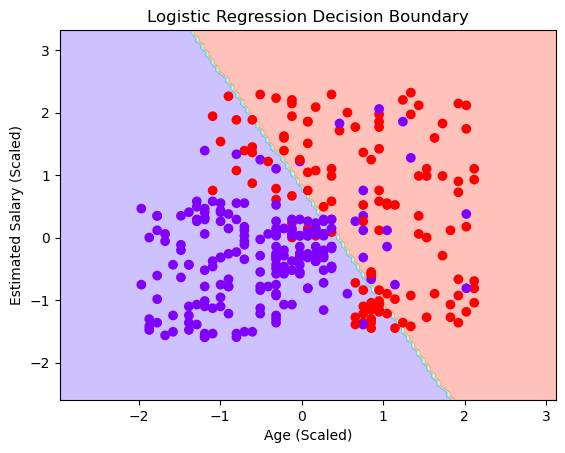

In [22]:
x_min, x_max = XTrainScaled[:, 0].min() - 1, XTrainScaled[:, 0].max() + 1
y_min, y_max = XTrainScaled[:, 1].min() - 1, XTrainScaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3, cmap='rainbow')
plt.scatter(XTrainScaled[:, 0], XTrainScaled[:, 1], c=ytrain, cmap='rainbow')
plt.title("Logistic Regression Decision Boundary")
plt.xlabel("Age (Scaled)")
plt.ylabel("Estimated Salary (Scaled)")
plt.show()

In [24]:
print("Prediction -",clf.predict(scaler.transform([[40, 100000]])))

Prediction - [1]
